<a href="https://colab.research.google.com/github/kiannakazemi/Football-Analysis-3/blob/main/FootballAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import operator

Using NetworkX I created a directed graph where the nodes are the 11 players of the basic formation and edges are the number of passes between each two players.

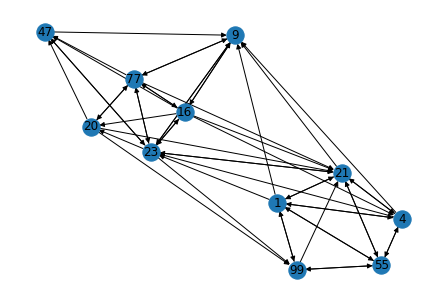

In [ ]:
G = nx.DiGraph()

G.add_node(1, name="Perin", role = 'Difensore')
G.add_node(55, name="Masiello", role = 'Difensore')
G.add_node(21, name="Radovanovic", role = 'Difensore')
G.add_node(4, name="Criscito", role = 'Difensore')
G.add_node(99, name="Czyborra", role = 'Centrocampista')
G.add_node(20, name="Strootman", role = 'Centrocampista')
G.add_node(47, name="Badelj", role = 'Centrocampista')
G.add_node(16, name="Zajic", role = 'Centrocampista')
G.add_node(77, name="Zappacosta", role = 'Centrocampista')
G.add_node(9, name="Scamacca", role = 'Attaccante')
G.add_node(23, name="Destro", role = 'Attaccante')

players_list = [(1,55,21.0),(55,1,34.0),(1,21,54.0),(21,1,43.0),(1,4,23.0),(4,1,12.0),(4,55,56.0),(55,4,23.0),(21,55,10.0),
(55,21,34.0),(21,4,34.0),(4,21,44.0),(1,99,21.0),(99,1,5.0),(99,55,3.0),(55,99,6.0),(99,21,47.0),
(99,21,47.0),(20,21,15.0),(20,47,80.0),(20,99,16.0),(20,77,35.0),(16,21,5.0),(16,20,34.0),(16,47,45.0),
(16,77,22.0),(16,4,15.0),(16,9,15.0),(16,23,25.0),(16,21,12.0),(77,21,10.0),(77,47,35.0),(77,9,28.0),
(77,23,25.0),(77,16,25.0),(77,20,32.0),(23,9,15.0),(9,23,12.0),(23,77,12.0),(9,77,11.0),(9,16,15.0),
(23,16,21.0),(23,20,2.0),(23,21,4.0),(23,47,15.0),(23,99,11.0),(1,23,25.0),(1,9,14.0),(21,9,8.0),
(21,23,15.0),(4,9,5.0),(4,23,4.0),(47,9,15.0),(47,23,15.0)]

G.add_weighted_edges_from(players_list)
nx.draw(G, with_labels = True)
plt.show()

Using a for loop we can find out the total number of passes efected and recieved by each player.

In [ ]:
for i in G.nodes():
  print(G.nodes[i]['name'], "effected", int(G.out_degree(i, weight='weight')), "passes.")
  print(G.nodes[i]['name'], "recieved", int(G.in_degree(i, weight='weight')), "passes. \n")

Perin effected 158 passes.
Perin recieved 94 passes. 

Masiello effected 97 passes.
Masiello recieved 90 passes. 

Radovanovic effected 110 passes.
Radovanovic recieved 220 passes. 

Criscito effected 121 passes.
Criscito recieved 95 passes. 

Czyborra effected 55 passes.
Czyborra recieved 54 passes. 

Strootman effected 146 passes.
Strootman recieved 68 passes. 

Badelj effected 30 passes.
Badelj recieved 175 passes. 

Zajic effected 168 passes.
Zajic recieved 61 passes. 

Zappacosta effected 155 passes.
Zappacosta recieved 80 passes. 

Scamacca effected 38 passes.
Scamacca recieved 100 passes. 

Destro effected 80 passes.
Destro recieved 121 passes. 



To find the central players in the game I used pagerank, and to find the players who facilitate the passage of the ball between players I used betweenness_centrality.

In [ ]:
def get_name(G, d):
    for key in d.keys():
        print(G.nodes[key]['name'])

#Find central players
pg = dict(sorted(nx.pagerank(G).items(), key = lambda item: item[1]))

print("The central players in ascending order are:")
get_name(G, pg)

print("\n-------------------------------------------------------------------------------\n")

#Find the players who facilitate the passage of the ball between players
btc = dict(sorted(nx.betweenness_centrality(G).items(), key = lambda item: item[1], reverse = True))

print("The players from those who facilitate the ball passage between players the most to the ones who facilitate it less:")
get_name(G, btc)

The central players in ascending order are:
Strootman
Czyborra
Masiello
Zappacosta
Criscito
Perin
Zajic
Badelj
Scamacca
Destro
Radovanovic

-------------------------------------------------------------------------------

The players from those who facilitate the ball passage between players the most to the ones who facilitate it less:
Destro
Radovanovic
Scamacca
Perin
Zajic
Criscito
Czyborra
Zappacosta
Masiello
Strootman
Badelj


To find the number of in/out passes I added the 'role' attribute. After initializing six variables to 0, I increased them by their nodes in_degree and out_degree based on the player's role.

In [ ]:
defenseIN = 0
defenseOUT = 0
midfielderIN = 0
midfielderOUT = 0
strikerIN = 0
strikerOUT = 0

for i in G.nodes():
  r = G.nodes[i]['role']
  if(r == 'Difensore'):
    defenseIN += G.in_degree(i, weight='weight')
    defenseOUT += G.out_degree(i, weight='weight')
  elif(r == 'Centrocampista'):
    midfielderIN += G.in_degree(i, weight='weight')
    midfielderOUT += G.out_degree(i, weight='weight')
  else:
    strikerIN += G.in_degree(i, weight='weight')
    strikerOUT += G.out_degree(i, weight='weight')

print("The number of in-passes by the team in the defense area is:", defenseIN)
print("The number of out-passes by the team in the defense area is:", defenseOUT)

print("The number of in-passes by the team in the midfielder area is:", midfielderIN)
print("The number of out-passes by the team in the midfielder area is:", midfielderOUT)

print("The number of in-passes by the team in the striker area is:", strikerIN)
print("The number of out-passes by the team in the striker area is:", strikerOUT)

The number of in-passes by the team in the defense area is: 499.0
The number of out-passes by the team in the defense area is: 486.0
The number of in-passes by the team in the midfielder area is: 438.0
The number of out-passes by the team in the midfielder area is: 554.0
The number of in-passes by the team in the striker area is: 221.0
The number of out-passes by the team in the striker area is: 118.0


ALTRE MISURE A NOSTRA SCELTA

Find out:
1.   The players who passed the ball to more players in descending order
2.   The players who received more passes from other players in descending order

In [ ]:
def get_name (g, d): #get_name returns the name of the players
  for key in d.keys():
    print(G.nodes[key]['name'])

#using out_degree_centrality to find the players who passed the ball to more players
cenOUT = dict(sorted(nx.out_degree_centrality(G).items(), key = lambda item: item[1], reverse=True))

#using in_degree_centrality to find the players who received more passes from other players
cenIN = dict(sorted(nx.in_degree_centrality(G).items(), key = lambda item: item[1], reverse=True))

print("The players who passed the ball to more players are:")
get_name(G, cenOUT)

print("\n-------------------------------------------------------------------------------\n")

print("The players who received more passes from other players are:")
get_name(G, cenIN)

The players who passed the ball to more players are:
Zajic
Destro
Perin
Zappacosta
Radovanovic
Criscito
Masiello
Strootman
Czyborra
Scamacca
Badelj

-------------------------------------------------------------------------------

The players who received more passes from other players are:
Radovanovic
Scamacca
Destro
Perin
Masiello
Criscito
Czyborra
Badelj
Zappacosta
Strootman
Zajic
